<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_0_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,77.776728,37.529117,48.051014,0.203207,173.560066,173.328134,0.231932
1,0.0,1.0,23.892024,34.354761,28.263311,-0.245742,96.264354,96.486628,-0.222274
2,0.0,2.0,97.888426,53.223987,43.496415,-0.821686,203.787143,204.630014,-0.842871
3,0.0,3.0,25.755264,51.483301,70.060304,0.519233,157.818102,157.279967,0.538135
4,0.0,4.0,24.991444,77.342211,50.905226,-1.033436,162.205446,163.310175,-1.104729
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,85.192088,42.607381,32.814419,1.059552,171.673441,170.606427,1.067013
119996,999.0,116.0,93.834757,98.276745,55.844312,0.063542,258.019355,257.938813,0.080542
119997,999.0,117.0,31.901727,86.562183,53.941309,0.049997,182.455216,182.421642,0.033574
119998,999.0,118.0,97.676397,47.720973,32.768315,0.002532,188.168218,188.149251,0.018966


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    77.776728  37.529117  48.051014  0.203207  173.560066   
      1.0    23.892024  34.354761  28.263311 -0.245742   96.264354   
      2.0    97.888426  53.223987  43.496415 -0.821686  203.787143   
      3.0    25.755264  51.483301  70.060304  0.519233  157.818102   
      4.0    24.991444  77.342211  50.905226 -1.033436  162.205446   
...                ...        ...        ...       ...         ...   
999.0 115.0  85.192088  42.607381  32.814419  1.059552  171.673441   
      116.0  93.834757  98.276745  55.844312  0.063542  258.019355   
      117.0  31.901727  86.562183  53.941309  0.049997  182.455216   
      118.0  97.676397  47.720973  32.768315  0.002532  188.168218   
      119.0  64.807809  29.309275  68.731886  0.476779  173.325749   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    173.328134  0.231932  
      1.0     96.486628 -0.222274  
      2.0    204.630014 -0.842871  
      3.0    157.279967  0.538135  
      4.0    163.310175 -1.104729  
...                 ...       ...  
999.0 115.0  170.606427  1.067013  
      116.0  257.938813  0.080542  
      117.0  182.421642  0.033574  
      118.0  188.149251  0.018966  
      119.0  172.904036  0.421712  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    77.776728  37.529117  48.051014  0.203207  173.560066   
      1.0    23.892024  34.354761  28.263311 -0.245742   96.264354   
      2.0    97.888426  53.223987  43.496415 -0.821686  203.787143   
      3.0    25.755264  51.483301  70.060304  0.519233  157.818102   
      4.0    24.991444  77.342211  50.905226 -1.033436  162.205446   
...                ...        ...        ...       ...         ...   
999.0 115.0  85.192088  42.607381  32.814419  1.059552  171.673441   
      116.0  93.834757  98.276745  55.844312  0.063542  258.019355   
      117.0  31.901727  86.562183  53.941309  0.049997  182.455216   
      118.0  97.676397  47.720973  32.768315  0.002532  188.168218   
      119.0  64.807809  29.309275  68.731886  0.476779  173.325749   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    173.328134  0.231932  
      1.0     96.486628 -0.222274  
      2.0    204.630014 -0.842871  
      3.0    157.279967  0.538135  
      4.0    163.310175 -1.104729  
...                 ...       ...  
999.0 115.0  170.606427  1.067013  
      116.0  257.938813  0.080542  
      117.0  182.421642  0.033574  
      118.0  188.149251  0.018966  
      119.0  172.904036  0.421712  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,77.776728,37.529117,48.051014,0.203207,173.560066,173.328134,0.231932
1,0.0,1.0,23.892024,34.354761,28.263311,-0.245742,96.264354,96.486628,-0.222274
2,0.0,2.0,97.888426,53.223987,43.496415,-0.821686,203.787143,204.630014,-0.842871
3,0.0,3.0,25.755264,51.483301,70.060304,0.519233,157.818102,157.279967,0.538135
4,0.0,4.0,24.991444,77.342211,50.905226,-1.033436,162.205446,163.310175,-1.104729
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,85.192088,42.607381,32.814419,1.059552,171.673441,170.606427,1.067013
119996,999.0,116.0,93.834757,98.276745,55.844312,0.063542,258.019355,257.938813,0.080542
119997,999.0,117.0,31.901727,86.562183,53.941309,0.049997,182.455216,182.421642,0.033574
119998,999.0,118.0,97.676397,47.720973,32.768315,0.002532,188.168218,188.149251,0.018966


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    77.776728  37.529117  48.051014  0.203207  173.560066   
      1.0    23.892024  34.354761  28.263311 -0.245742   96.264354   
      2.0    97.888426  53.223987  43.496415 -0.821686  203.787143   
      3.0    25.755264  51.483301  70.060304  0.519233  157.818102   
      4.0    24.991444  77.342211  50.905226 -1.033436  162.205446   
...                ...        ...        ...       ...         ...   
999.0 115.0  85.192088  42.607381  32.814419  1.059552  171.673441   
      116.0  93.834757  98.276745  55.844312  0.063542  258.019355   
      117.0  31.901727  86.562183  53.941309  0.049997  182.455216   
      118.0  97.676397  47.720973  32.768315  0.002532  188.168218   
      119.0  64.807809  29.309275  68.731886  0.476779  173.325749   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    173.328134  0.231932  
      1.0     96.486628 -0.222274  
      2.0    204.630014 -0.842871  
      3.0    157.279967  0.538135  
      4.0    163.310175 -1.104729  
...                 ...       ...  
999.0 115.0  170.606427  1.067013  
      116.0  257.938813  0.080542  
      117.0  182.421642  0.033574  
      118.0  188.149251  0.018966  
      119.0  172.904036  0.421712  

[120000 rows x 7 columns]

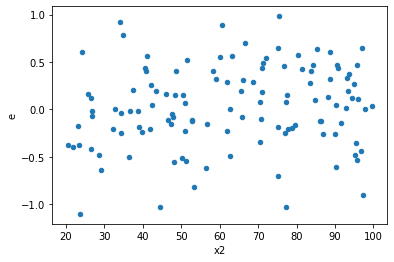

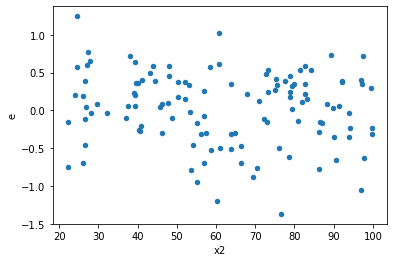

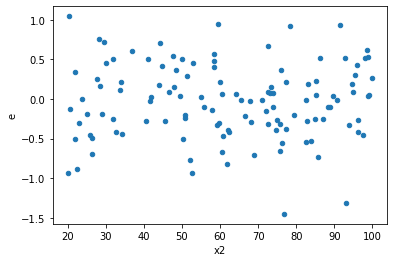

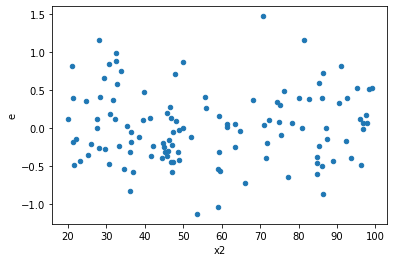

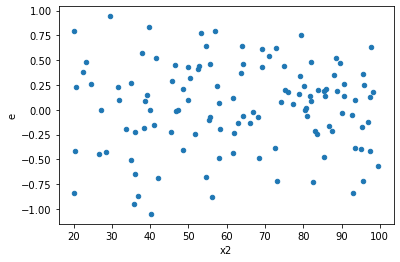

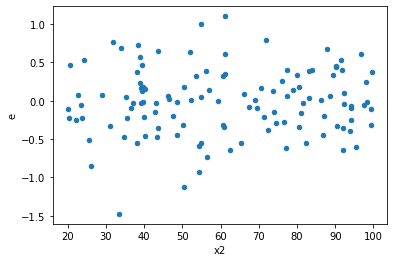

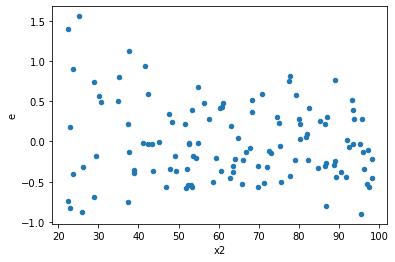

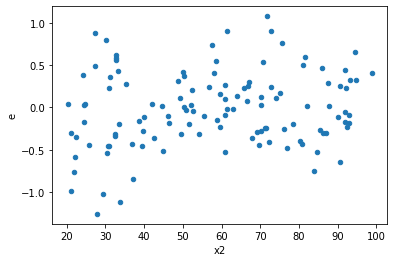

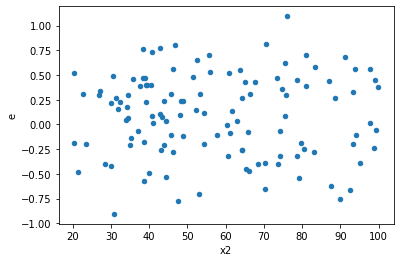

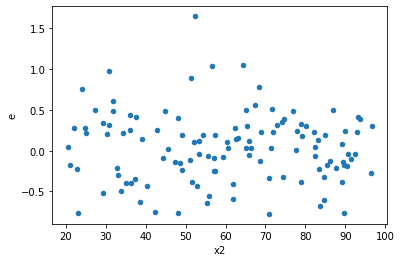

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,56.0,58.0,9.425476789318779,11.337179180001762,0.16831208552354962,0.19546860655175452,1.161346233360083,0.5730047219978425,0.7134976390010788,0.28650236099892123,Reject001=1 : Homoscedasticity
3.0,54.0,60.0,11.754178853757194,13.04563875018055,0.21766997877328137,0.21742731250300917,0.9988851642673015,0.9996174345087154,0.5001912827456423,0.4998087172543577,Reject001=1 : Homoscedasticity
4.0,55.0,59.0,8.296441148416175,12.870123152181367,0.15084438451665774,0.2181376805454469,1.4461107136630464,0.16522159584651286,0.9173892020767436,0.08261079792325643,Reject001=1 : Homoscedasticity
7.0,56.0,58.0,7.940871485757445,12.947442332047853,0.14180127653138294,0.22323176434565264,1.5742577909462458,0.08878951704980853,0.9556052414750957,0.044394758524904265,Reject001=1 : Homoscedasticity
8.0,51.0,63.0,8.086886925531653,11.549012425852432,0.15856641030454222,0.1833176575532132,1.1560938864740256,0.580523904995258,0.709738047502371,0.290261952497629,Reject001=1 : Homoscedasticity
10.0,53.0,61.0,7.97356274022284,10.428812528813378,0.15044458000420452,0.17096413981661274,1.1363928152934106,0.6268693442282411,0.6865653278858794,0.31343467211412057,Reject001=1 : Homoscedasticity
14.0,53.0,61.0,7.5765810439939365,11.877167138255924,0.14295435932064032,0.19470765800419548,1.3620267260788794,0.24341531460980903,0.8782923426950955,0.12170765730490452,Reject001=1 : Homoscedasticity
16.0,60.0,54.0,12.731066158667394,12.689500765778412,0.2121844359777899,0.23499075492182245,1.1074834675735583,0.7053773578353688,0.6473113210823156,0.3526886789176844,Reject001=1 : Homoscedasticity
19.0,55.0,59.0,8.45700892918614,10.726706571283424,0.15376379871247528,0.18180858595395635,1.18238875129459,0.5269700081198108,0.7365149959400946,0.2634850040599054,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,56.0,58.0,9.425476789318779,11.337179180001762,0.16831208552354962,0.19546860655175452,1.161346233360083,0.5730047219978425,Reject001=1 : Homoscedasticity
1.0,59.0,55.0,14.035352762101711,10.784289625887242,0.23788733495087647,0.19607799319794986,0.8242472985728299,0.4657834382084199,Reject001=1 : Homoscedasticity
2.0,54.0,60.0,13.080494748479602,11.344223944461179,0.24223138423110374,0.189070399074353,0.7805363441013412,0.3564809703046918,Reject001=1 : Homoscedasticity
3.0,54.0,60.0,11.754178853757194,13.04563875018055,0.21766997877328137,0.21742731250300917,0.9988851642673015,0.9996174345087154,Reject001=1 : Homoscedasticity
4.0,55.0,59.0,8.296441148416175,12.870123152181367,0.15084438451665774,0.2181376805454469,1.4461107136630464,0.16522159584651286,Reject001=1 : Homoscedasticity
5.0,63.0,51.0,15.647949203115038,6.335867844435775,0.24838014608119108,0.12423270283207402,0.500171631236035,0.009201091510147358,Reject001=0 : Heteroscedasticity
6.0,35.0,79.0,11.336056126670027,12.574830193687898,0.3238873179048579,0.15917506574288479,0.49145198636534004,0.021462800121838203,Reject001=1 : Homoscedasticity
7.0,56.0,58.0,7.940871485757445,12.947442332047853,0.14180127653138294,0.22323176434565264,1.5742577909462458,0.08878951704980853,Reject001=1 : Homoscedasticity
8.0,51.0,63.0,8.086886925531653,11.549012425852432,0.15856641030454222,0.1833176575532132,1.1560938864740256,0.580523904995258,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      972
Reject001=0 : Heteroscedasticity     28
Name: Result_test, dtype: int64